# User Repayment Behaviour

## First Steps:
1. Cleaned the data, removing null & missing values, converted columns into consistent dtypes as per variable type (Removing Objects, converting dates to datetime,etc)
2. Added necessary data to other tables (like cycle_id,final_settlement_status,etc). Utilized functions wherever necessary to reduce redundancy
3. Created Aggregate columns(User Level & Transaction Level) for easier analysis
4. Didn't create buckets for credit limit, since credit limits were already limited and highly skewed.
5. Created new column for One-time Settlements. This represents high intent on the user's part. So makes sense to study separately.
6. Since the aim was to predict repayment behaviour, final Settlement Status was taken as the Label as opposed to other potential labels like no of days delayed, transaction & cycles behaviour, etc.

## Final Table

In [1549]:
user_journey.head()

,user_id,avg_settle_amount,onetime_settlements,no_of_settlements,last_cycle,latest_status,referrer,city_id,credit_limit_cycle,global_credit_limit,avg_days_delayed,total_transactions,total_transaction_amount,no_of_cycles,avg_trans_per_cycle,failures,avg_transaction_amount
0,1.0,69433.333333,0.0,3.0,18.0,1.0,a,4.0,15.0,150000.0,0.026240,6.0,208300.0,3.0,69433.333333,1.0,34716.666667
1,2.0,72621.461538,0.0,12.0,19.0,0.0,a,7.0,3.0,500000.0,5.355662,41.0,975079.0,15.0,65005.266667,14.0,23782.414634
2,4.0,24685.714286,2.0,7.0,20.0,1.0,a,3.0,3.0,500000.0,7.422971,13.0,173800.0,8.0,21725.000000,6.0,13369.230769
3,5.0,30533.333333,0.0,3.0,14.0,1.0,a,7.0,2.0,500000.0,10.471518,5.0,112600.0,4.0,28150.000000,6.0,22520.000000
4,6.0,79062.666667,0.0,9.0,17.0,1.0,a,154.0,3.0,500000.0,6.127644,36.0,1123286.0,13.0,86406.615385,7.0,31202.388889


## Unique Users
The data set contains details of 16,050 unique users. Of these, 14,106 users did atleast one transaction. We have settlement data of 11,443 unique users. While the difference is mostly because of new users after cycle 20, there are 243 users with transactions without settlement data.

From the settlement data until cycle 21, 8,871 users settled their dues and 2,572 users are currently pending.

In [1544]:
user_journey.groupby('latest_status')['user_id'].count()

latest_status
0.0    2572
1.0    8871
Name: user_id, dtype: int64

## Days Delayed
Looking at average days delayed in settling the bill, we notice that the median of this data is quite low at 1.18 days. 

Checking the difference based on final status shows a clear trend:
Median for Settled users: 1.61 days
Median for Pending users: 6.57 days

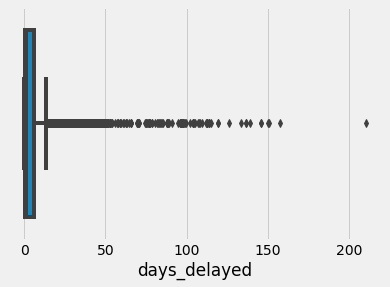

In [1548]:
sns.boxplot(settlement_df['days_delayed'])

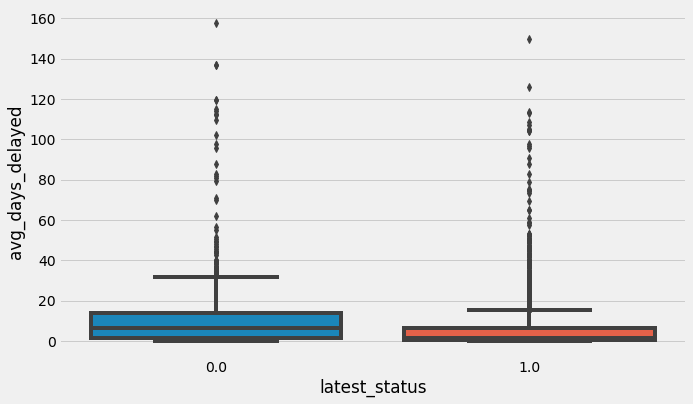

In [1550]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='latest_status',y='avg_days_delayed',data=user_journey)

In [1563]:
user_journey.groupby('latest_status')['onetime_settlements'].sum()

latest_status
0.0     306.0
1.0    5397.0
Name: onetime_settlements, dtype: float64

## One Time Settlements

There seems to be a trend between users preferring One Time Settlements and users who settled their bills.
Of the 3161 users who have done one-time settlements, only 210 users are currently in default. One time settlements seem like a good indicator of user retention. Visible trend of more one-time settlements of bill_settled users.

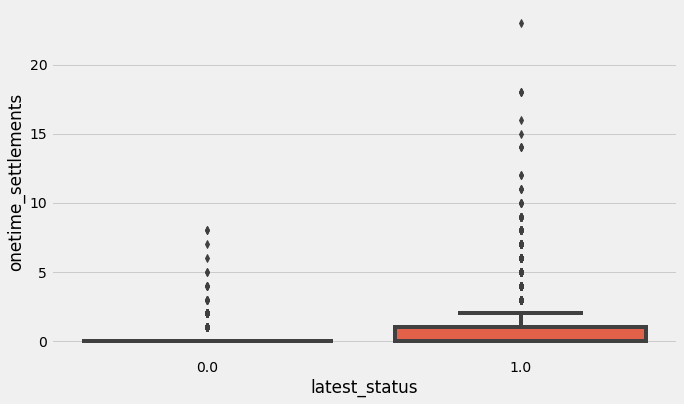

In [1554]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='latest_status',y='onetime_settlements',data=user_journey)

## No of Settlements

From the below Boxplots, we can see that users with more no. of settlements tend to default less. Users who defaulted have median of 0 settlements while non-default users have median of 2 settlements

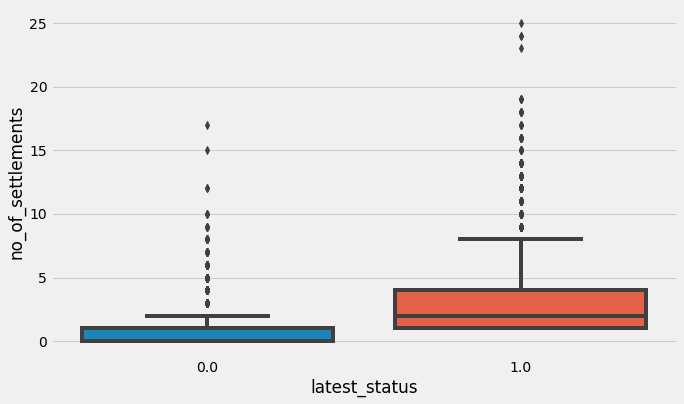

In [1574]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='latest_status',y='no_of_settlements',data=user_journey)

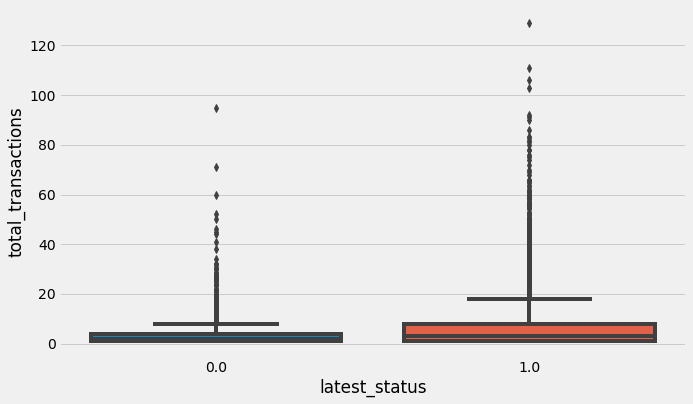

In [1487]:
plt.figure(figsize = (10, 6))
sns.boxplot(x='latest_status',y='total_transactions',data=user_journey)

## City Wise Behaviour

There is a mostly uniform trend when it comes to default-rate by city. Cities 1,2&3 account for almost 57% of total users.

City_id 6 & 7 have higher default rates taking into account minimum 25 users per city.

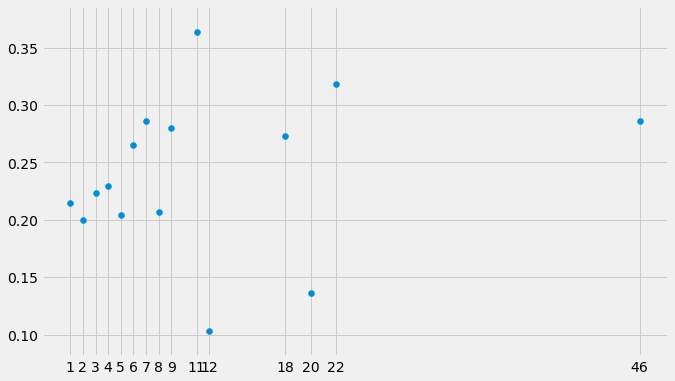

In [1587]:
plt.figure(figsize = (10, 6))
plt.box(city_data[city_data['total_users']>25]['city_id'],city_data[city_data['total_users']>25]['default_rate'])
plt.xticks(city_data[city_data['total_users']>25]['city_id'])
plt.show()

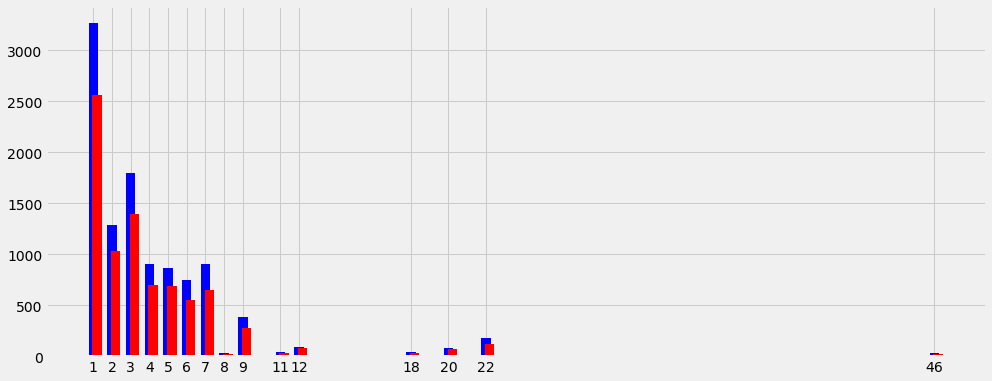

In [1610]:
plt.figure(figsize = (15, 6))
plt.bar(city_data[city_data['total_users']>25]['city_id'],city_data[city_data['total_users']>25]['total_users'],align='center',width=.5,color='b')
plt.bar(city_data[city_data['total_users']>25]['city_id']+.2,city_data[city_data['total_users']>25]['settled'],align='center',width=.5,color='r')
plt.xticks(city_data[city_data['total_users']>25]['city_id'])
plt.show()

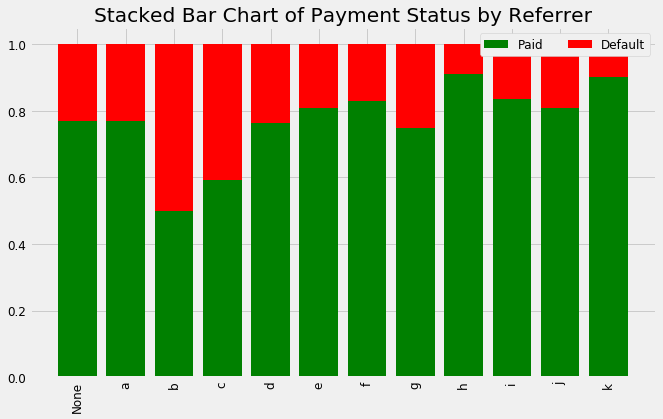

In [1611]:
plt.figure(figsize = (10, 6))
plt.bar(np.arange(len(ref_paid)), ref_paid['paid']/ref_paid['total'], .8, color='g')
p2 = plt.bar(np.arange(len(ref_paid)), ref_paid['defaults']/ref_paid['total'], .8, bottom=ref_paid['paid']/ref_paid['total'], color='r')
plt.xticks(np.arange(len(ref_paid)), ref_paid['referrer'], fontsize=12, rotation=90)
plt.yticks(fontsize=12)
plt.title('Stacked Bar Chart of Payment Status by Referrer')
plt.legend(('Paid','Default'),ncol=2, fontsize=12,framealpha=1, fancybox=True)
plt.show()

## Cycle Wise Trends

Default Rate has been mostly consistent when checked against cycle_id. I've plotted the same agains Avg Days delayed per cycle, which follows a similar trend.

### First Cycle of Month vs Second Cycle: 

First cycles had lower default rates of 7.8% compared to 8.6% for second cycles.

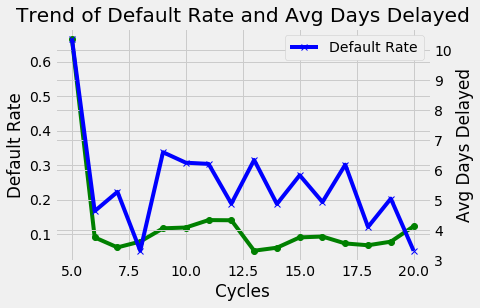

In [1630]:
fig,ax1 = plt.subplots()
ax2 = ax1.twinx()
ax1.set_ylabel('Default Rate')
ax2.set_ylabel('Avg Days Delayed')
ax1.set_xlabel('Cycles')
ax1.plot(bb['cycle_id'],bb['default_rate'],'g-',marker='o')
ax2.plot(cycle_delay['cycle_id'],cycle_delay['days_delayed'],'b-',marker='x')
plt.title('Trend of Default Rate and Avg Days Delayed')
plt.legend(('Default Rate','Avg Days Delayed'),framealpha=1,ncol=4)
plt.show()

Text(0.5,1,u'Default Rates - First vs Second Cycle of Month')

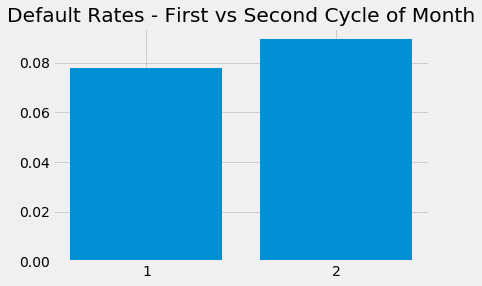

In [1672]:
plt.bar(np.arange(1,3),a.default_rate)
plt.xticks(np.arange(1,3))
plt.title('Default Rates - First vs Second Cycle of Month')

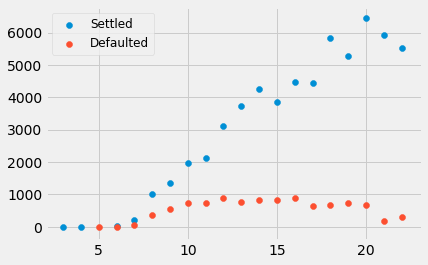

In [1678]:
a1=plt.scatter(np.array(tr_ans[tr_ans['latest_status']==1]['cycle_id']),np.array(tr_ans[tr_ans['latest_status']==1]['user_id']))
a2=plt.scatter(np.array(tr_ans[tr_ans['latest_status']==0]['cycle_id']),np.array(tr_ans[tr_ans['latest_status']==0]['user_id']))
plt.legend((a1,a2),('Settled','Defaulted'),fontsize=12)
plt.show()

## Merchant ID Trends

Merchant_ID #1 dominates the transactions among all users.
Checking Transaction and Default Rate trends, we can see Merchant_ID #2, #7, #8 might be problematic

Text(0.5,1,u'Plot of Merchant_ID vs Transaction Amount')

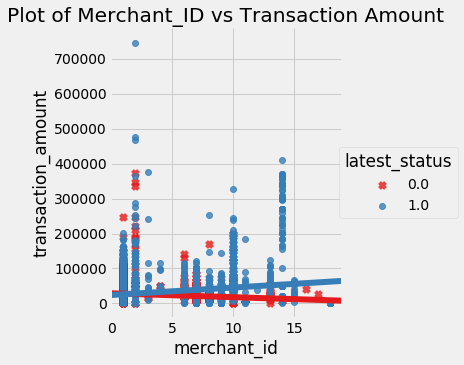

In [1665]:
sns.lmplot(x="merchant_id", y="transaction_amount", hue="latest_status", data=transaction_df,
           markers=["x", "o"], palette="Set1");
plt.title("Plot of Merchant_ID vs Transaction Amount")

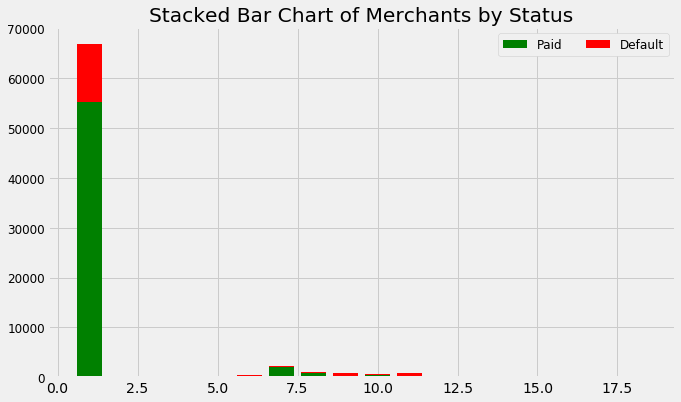

In [1661]:
plt.figure(figsize = (10, 6))
plt.bar(merch_1['merchant_id'].unique(), merch_1.groupby('merchant_id')['settled_users'].sum(), .8, color='g')
p2 = plt.bar(merch_1['merchant_id'].unique(), merch_1.groupby('merchant_id')['defaulters'].sum(), .8, bottom=merch_1.groupby('merchant_id')['settled_users'].sum(), color='r')
plt.yticks(fontsize=12)
plt.title('Stacked Bar Chart of Merchants by Status')
plt.legend(('Paid','Default'),ncol=2, fontsize=12,framealpha=1, fancybox=True)
plt.show()

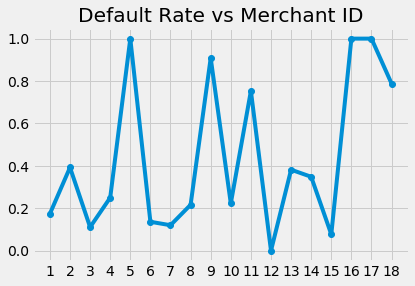

In [1667]:
plt.plot(merch_2['merchant_id'],np.array(merch_2['defaulters']/merch_2['total_users']),marker='o')
plt.xticks(merch_2['merchant_id'])
plt.title("Default Rate vs Merchant ID")
plt.show()

## Density Distributions w.r.t Settlement Status

1. Defaulters take longer to settle prior bills
2. Defaulters have less no of settlements
3. Total Transaction Amount peaks for Defaulters b

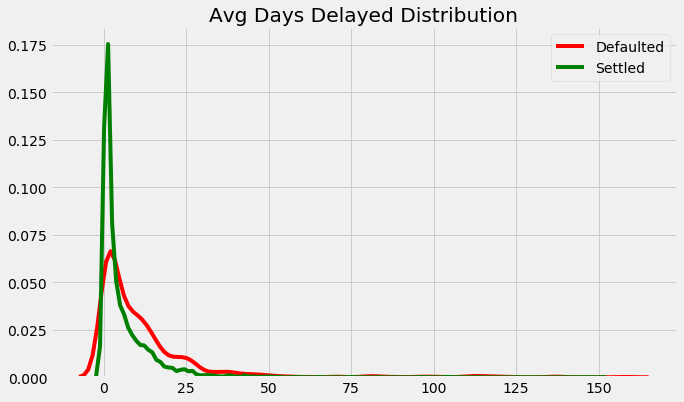

In [1648]:
plt.figure(figsize = (10, 6))
colorss=OrderedDict({0:'red',1:'green'})
status_map=OrderedDict({0:'Defaulted',1:'Settled'})
for a,b in colorss.items():
    sns.kdeplot(user_journey.loc[user_journey['latest_status'] == a, 'avg_days_delayed'].dropna(),
                color = b,label = status_map[a])
plt.title('Avg Days Delayed Distribution')
plt.show()

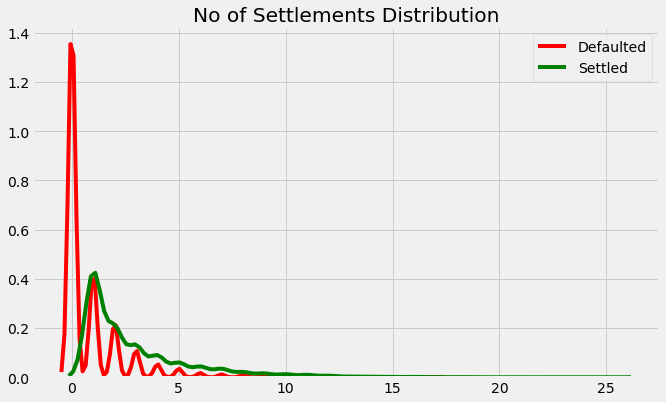

In [1649]:
plt.figure(figsize = (10, 6))
colorss=OrderedDict({0:'red',1:'green'})
status_map=OrderedDict({0:'Defaulted',1:'Settled'})
for a,b in colorss.items():
    sns.kdeplot(user_journey.loc[user_journey['latest_status'] == a, 'no_of_settlements'].dropna(),
                color = b,label = status_map[a])
plt.title('No of Settlements Distribution')
plt.show()

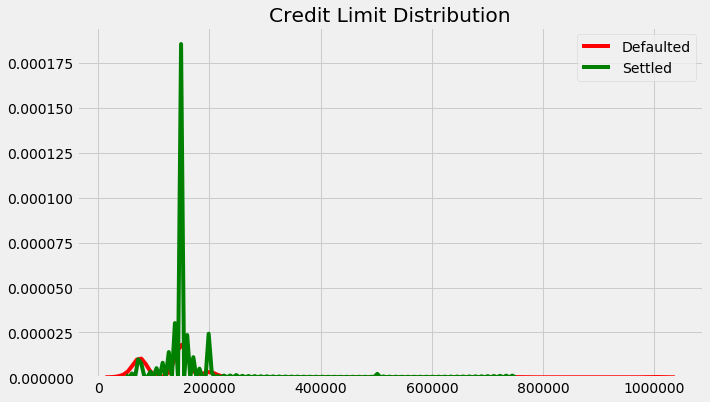

In [1651]:
plt.figure(figsize = (10, 6))
colorss=OrderedDict({0:'red',1:'green'})
status_map=OrderedDict({0:'Defaulted',1:'Settled'})
for a,b in colorss.items():
    sns.kdeplot(user_journey.loc[user_journey['latest_status'] == a, 'global_credit_limit'].dropna(),
                color = b,label = status_map[a])
plt.title('Credit Limit Distribution')
plt.show()

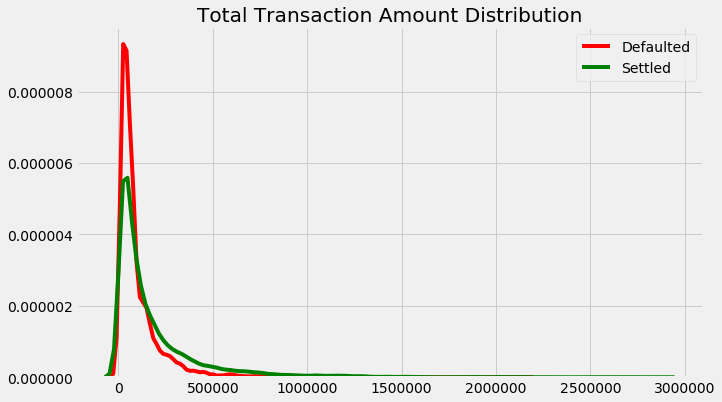

In [1652]:
plt.figure(figsize = (10, 6))
colorss=OrderedDict({0:'red',1:'green'})
status_map=OrderedDict({0:'Defaulted',1:'Settled'})
for a,b in colorss.items():
    sns.kdeplot(user_journey.loc[user_journey['latest_status'] == a, 'total_transaction_amount'].dropna(),
                color = b,label = status_map[a])
plt.title('Total Transaction Amount Distribution')
plt.show()

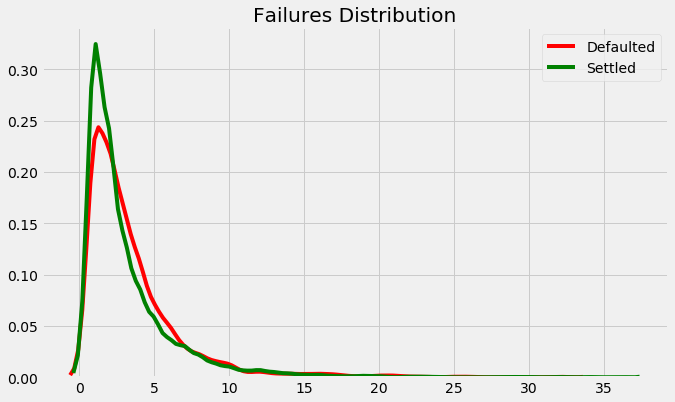

In [1653]:
plt.figure(figsize = (10, 6))
colorss=OrderedDict({0:'red',1:'green'})
status_map=OrderedDict({0:'Defaulted',1:'Settled'})
for a,b in colorss.items():
    sns.kdeplot(user_journey.loc[user_journey['latest_status'] == a, 'failures'].dropna(),
                color = b,label = status_map[a])
plt.title('Failures Distribution')
plt.show()

## Exploring Variables & Feature Construction

In [1673]:
variables1=['user_id','avg_settle_amount','onetime_settlements','no_of_settlements','latest_status','global_credit_limit','avg_days_delayed','total_transactions','total_transaction_amount','no_of_cycles','avg_trans_per_cycle','failures','avg_transaction_amount']
variables2=['avg_settle_amount','onetime_settlements','no_of_settlements','latest_status','global_credit_limit','avg_days_delayed','total_transactions','total_transaction_amount','no_of_cycles','avg_trans_per_cycle','failures','avg_transaction_amount']

In [1674]:
corr_matrix1 = user_journey[variables1].corr()

# Select upper triangle of correlation matrix
upper = corr_matrix1.where(np.triu(np.ones(corr_matrix1.shape), k=1).astype(np.bool))

# Find index of feature columns with correlation greater than 0.95
to_drop = [column for column in upper.columns if any(abs(upper[column]) > 0.7)]

to_drop

['total_transactions',
 'total_transaction_amount',
 'no_of_cycles',
 'avg_trans_per_cycle',
 'avg_transaction_amount']

**The above variables are all highly correlated with one another**

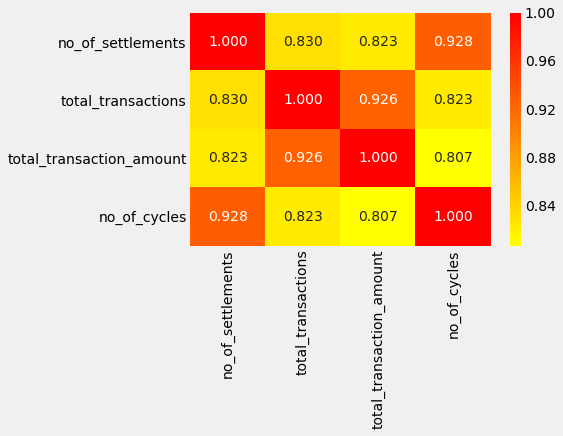

In [1676]:
sns.heatmap(corr_matrix.loc[corr_matrix['no_of_cycles'].abs() > 0.7, corr_matrix['no_of_cycles'].abs() > 0.7],
            annot=True, cmap = plt.cm.autumn_r, fmt='.3f');

## Correlation of every variable with the Label

We'll calculate the Pearson correlation of every variable with the Label. 

For the negative correlations, as we increase the variable, the Label value decreases. For the positive correlations, a higher value means a higher value of Target indicating the poverty severity decreases.

### Most important variables for user repayments:
1. **no_of_settlements**
2. **no_of_cycles**
3. **onetime_settlements**
4. **avg_days_delayed**

In [1680]:
train2 = user_journey[variables1].loc[user_journey['latest_status'].notnull(), :].copy()

pcorrs = pd.DataFrame(train2.corr()['latest_status'].sort_values()).rename(columns = {'latest_status': 'pcorr'}).reset_index()
pcorrs = pcorrs.rename(columns = {'index': 'feature'})

print('Most negatively correlated variables:')
print(pcorrs.head())

print('\nMost positively correlated variables:')
print(pcorrs.dropna().tail())

Most negatively correlated variables:
                  feature     pcorr
0        avg_days_delayed -0.195320
1       avg_settle_amount -0.083038
2                failures -0.051750
3     avg_trans_per_cycle -0.003495
4  avg_transaction_amount  0.035302

Most positively correlated variables:
                     feature     pcorr
8   total_transaction_amount  0.143115
9        onetime_settlements  0.171390
10              no_of_cycles  0.212661
11         no_of_settlements  0.335327
12             latest_status  1.000000


## Features Plot

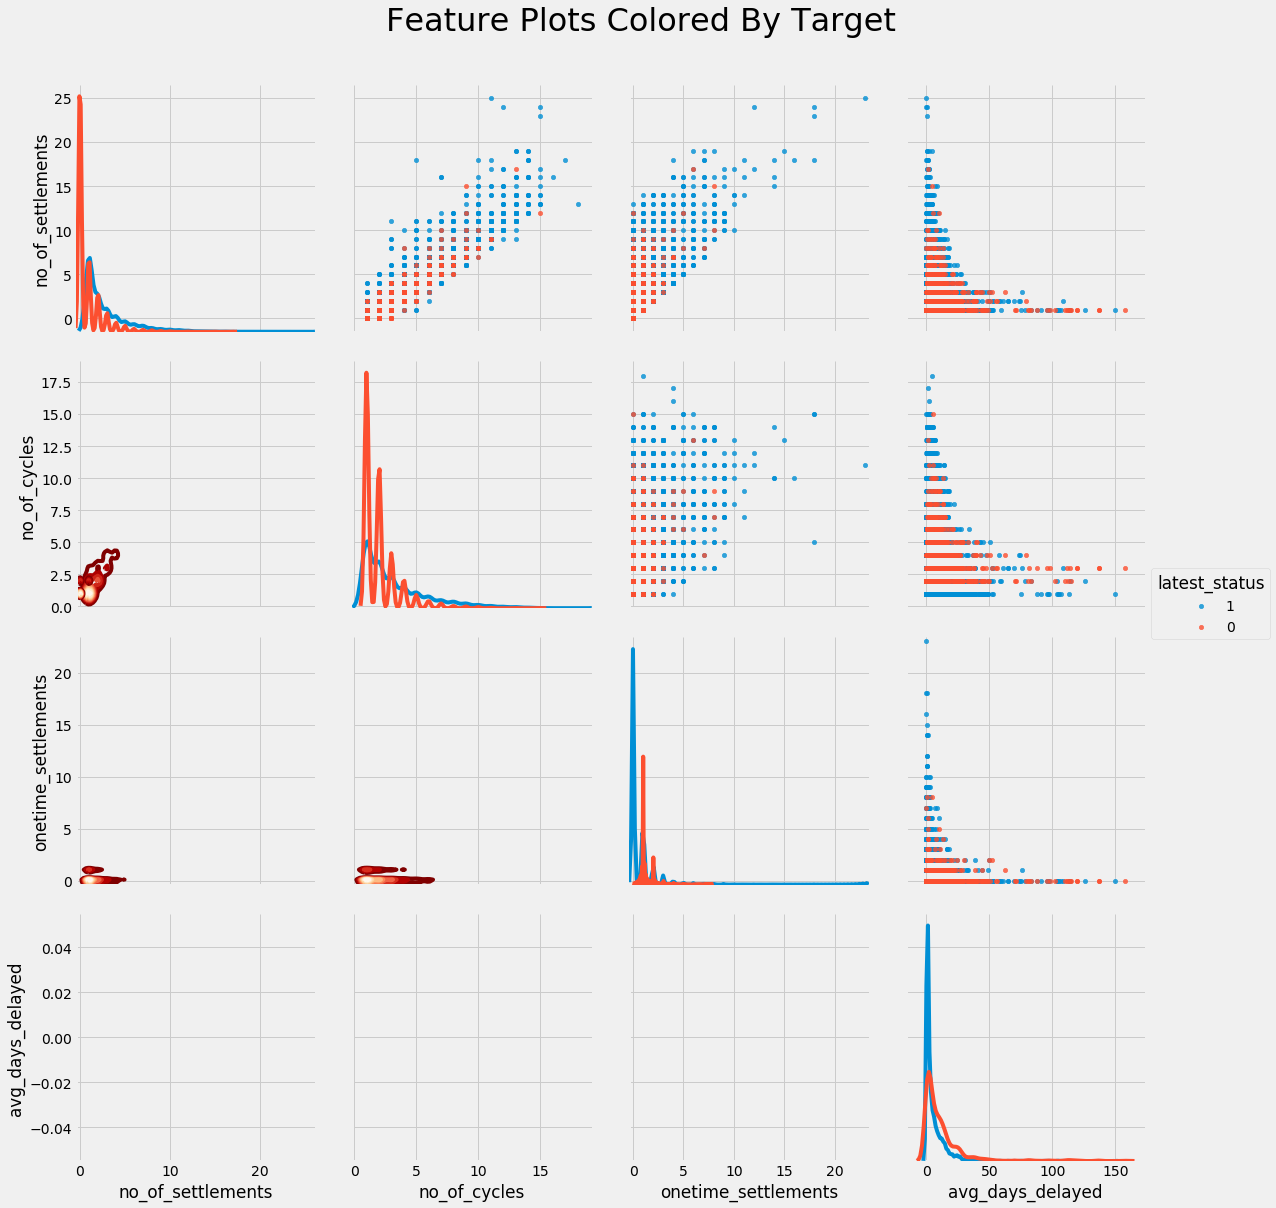

In [1681]:
import warnings
warnings.filterwarnings('ignore')
plot_data = user_journey[['latest_status', 'no_of_settlements', 'no_of_cycles',
                         'onetime_settlements', 'avg_days_delayed']]

# Create the pairgrid object
grid = sns.PairGrid(data = plot_data, size = 4, diag_sharey=False,
                    hue = 'latest_status', hue_order = [1,0], 
                    vars = [x for x in list(plot_data.columns) if x != 'latest_status'])

# Upper is a scatter plot
grid.map_upper(plt.scatter, alpha = 0.8, s = 20)

# Diagonal is a histogram
grid.map_diag(sns.kdeplot)

# Bottom is density plot
grid.map_lower(sns.kdeplot, cmap = plt.cm.OrRd_r);
grid = grid.add_legend()
plt.suptitle('Feature Plots Colored By Target', size = 32, y = 1.05);

## Findings:

### These are the most important variables for user repayments:
1. **no_of_settlements**
2. **no_of_cycles**
3. **onetime_settlements**
4. **avg_days_delayed**

A few potential issues in relationship between Settlement Status and Merchant_id, City_id have been identified.

## Note:
I noticed some major issues with the datasets:
    1. One-Time Settlement is being recorded in current cycle while Bill Settlement is recorded as next cycle (ex:user_id 25)
    2. There are missing gaps where users with Bill_pending status have transactions in the next cycle (user_id: 8848)
    3. Credit cycles are very irregularly timed. thankfully it matches with the transaction and settlements data!